Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

We have 614 rows and 13 columns in data

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 object and 5 numerical columns in data

In [6]:
df['Loan_Amount_Term'].nunique()

10

In [7]:
df['Dependents'].nunique()

4

In [8]:
df['LoanAmount'].nunique()

203

In [9]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [11]:
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Filling LoanAmount with mean values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [16]:
df.shape

(614, 12)

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can see there is big difference between 75% and max , means there must be outliers in data

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

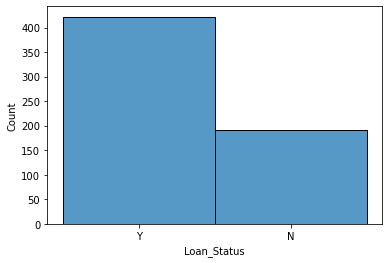

In [18]:
sns.histplot(df['Loan_Status'])

Data is imbalance

# EDA

In [19]:
import matplotlib.pyplot as plt
dfcorr=df.corr()

<AxesSubplot:>

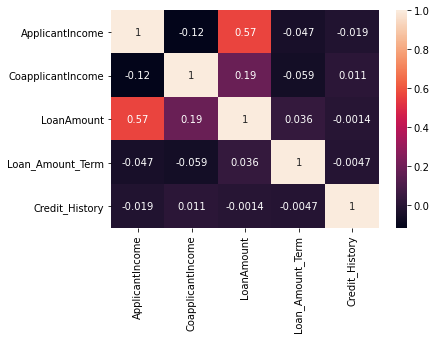

In [20]:
sns.heatmap(dfcorr,annot=True)

We can not notice LoanAmount is correlated with ApplicantIncome, all the other featurs are negatively correlated with each other

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


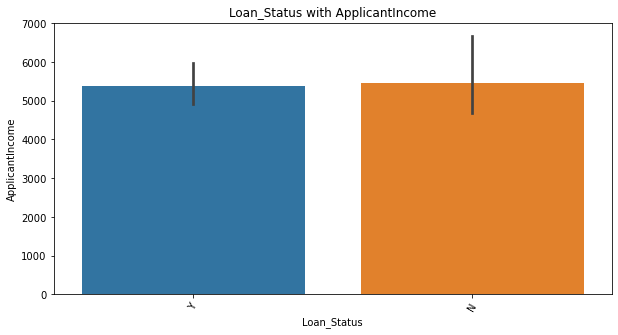

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=60)
plt.show()


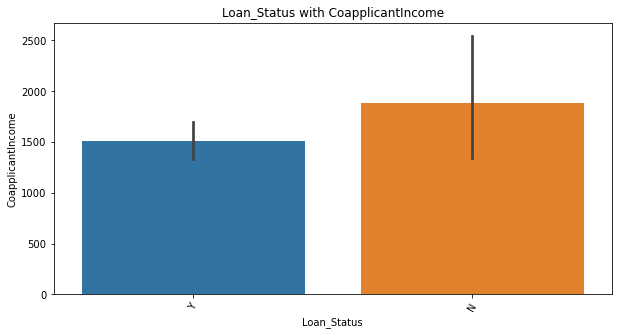

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

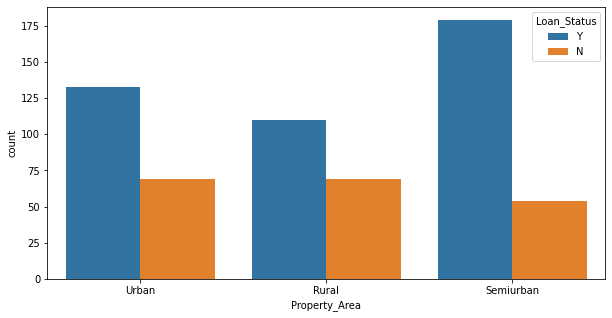

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People those are from Urban area having 50-50 chances of approval depends and other parameters as well. In RuralProperty_area not approval chances are increasing. In Semiurban area there are high chances to get approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

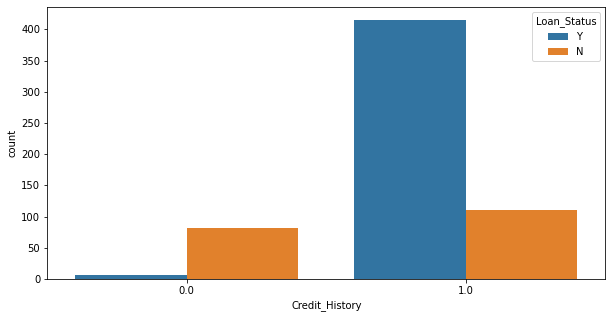

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Here we have the logical figure most of the people those are not getting approval, not having credit history, the people those having credit history, most of them getting approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

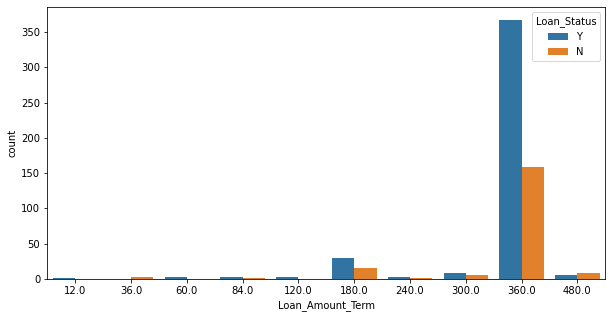

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved, People those are taking loan for 480 months, most of them are not getting approval

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

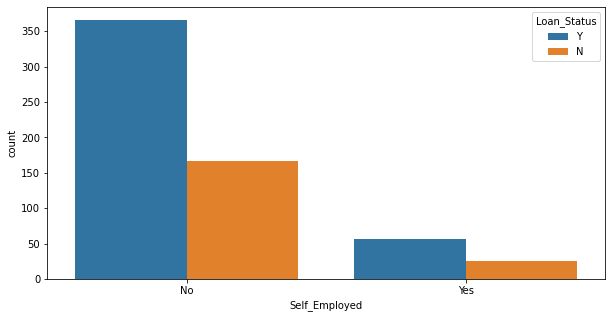

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

Most of the data we have from not employed person, Here we see if the person is not self employed there is high chances of approval
There are more than 350 people are approved and more than 150 are not approved those are not self_employed, In self_employed we see there around 50% of diffrence between approved and not approved people

<AxesSubplot:xlabel='Education', ylabel='count'>

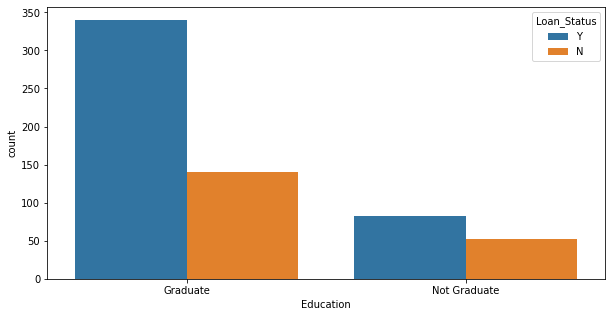

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=df)

There are high chances of approval for Graduate people, in Graduate category we have around 350 approved loan and around 150 not approved, In other side we can notice of the person is not graduate difference is very less in approved and not approved category

<AxesSubplot:xlabel='Dependents', ylabel='count'>

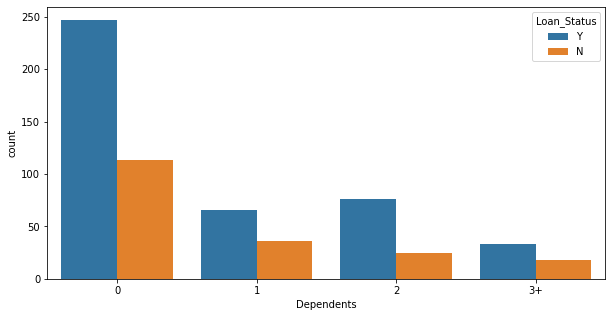

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

# Using LabelEncoder for convering categorical to numerical

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


All columns are converted into numerical now

# Skewness handling

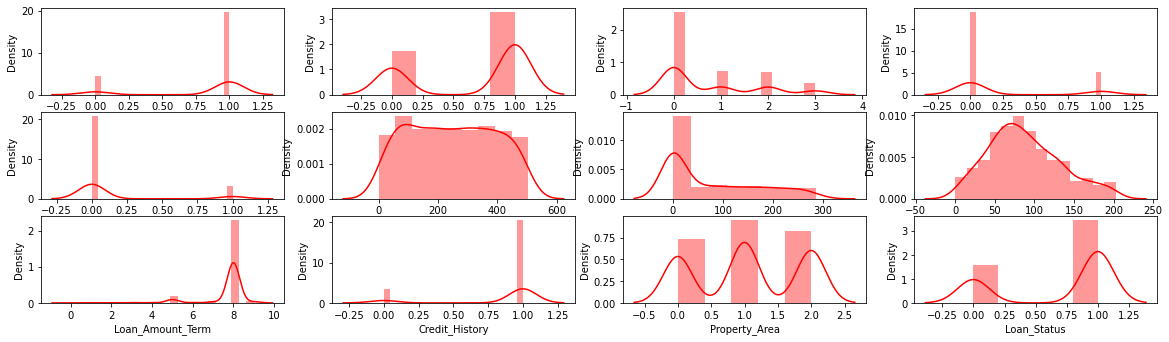

In [34]:
plt.figure(figsize=(20,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')


In [35]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

we can see here most of the columns are skewed, We will only deal with numerical columns ie CoapplicantIncome which will be treated

In [36]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

# Outliers Handling

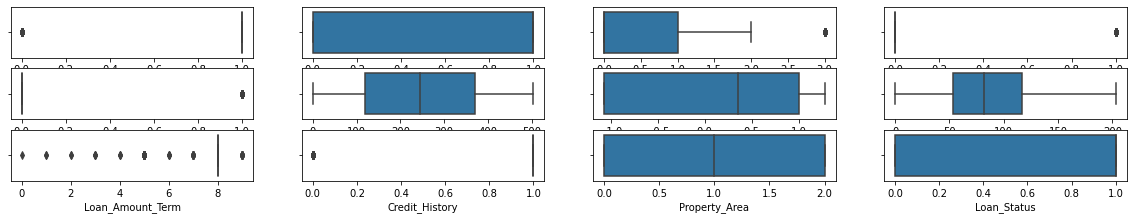

In [37]:
plt.figure(figsize=(20,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed .

# Removal Of Outliers

# Z Score Method

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [39]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)


with outliers:: (614, 12)
After removing outliers:: (602, 12)


# IQR Method

In [42]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

3.0

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


choosing ZSCORE because there is huge dataloss in IQR

# Dividing data into X and Y

In [44]:
df=df_1

In [45]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [46]:
x.shape

(602, 11)

In [47]:
y.shape

(602,)

# scaling X values

In [48]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [49]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [50]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.817276,0.652824,0.246401,0.217608,0.131229,0.491220,0.458587,0.434700,0.692691,0.852159,0.516611
std,0.386762,0.476468,0.336385,0.412963,0.337932,0.286063,0.426122,0.224584,0.206076,0.355237,0.394078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.234623,0.000000,0.267241,0.750000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.489087,0.623274,0.408867,0.750000,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.737599,0.883545,0.576355,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Imbalanced learn

Using OverSamling_BorderlineSMOTE because there is less data in Loan_Status for yes

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

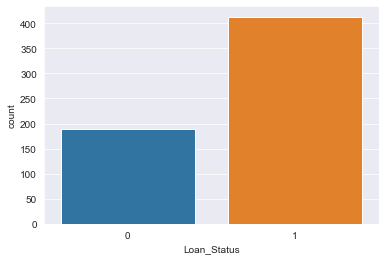

In [51]:
sns.set_style("darkgrid")
sns.countplot(x="Loan_Status", data=df)

In [52]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (602,)
Resample Target dataset shape (826,)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

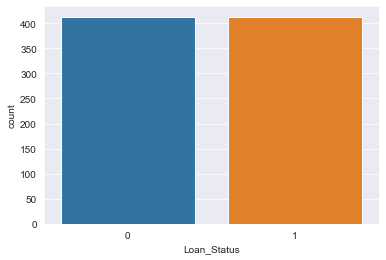

In [53]:
sns.set_style("darkgrid")
sns.countplot(y_rus)

Now we have balaced data for model training

# Splitting Train and Test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [56]:
x_train.shape

(602, 11)

In [57]:
x_test.shape

(224, 11)

In [58]:
y_train.shape

(602,)

In [59]:
y_test.shape

(224,)

# MODEL BUILDING

In [60]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Logistic Regression

In [63]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6355093099671413


In [64]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6160714285714286
[[48 54]
 [32 90]]
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       102
           1       0.62      0.74      0.68       122

    accuracy                           0.62       224
   macro avg       0.61      0.60      0.60       224
weighted avg       0.61      0.62      0.61       224

Training accuracy:: 0.6578073089700996
Test accuracy:: 0.6160714285714286


# DECISION TREE CLASSIFIER

In [65]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7506024096385543


In [66]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7767857142857143
[[86 16]
 [34 88]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       102
           1       0.85      0.72      0.78       122

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.78      0.78       224

Training accuracy:: 1.0
Test accuracy:: 0.7767857142857143


# KNeighbors Classifier

In [67]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7348083242059146


In [68]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7276785714285714
[[87 15]
 [46 76]]
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       102
           1       0.84      0.62      0.71       122

    accuracy                           0.73       224
   macro avg       0.74      0.74      0.73       224
weighted avg       0.75      0.73      0.73       224

Training accuracy:: 0.8488372093023255
Test accuracy:: 0.7276785714285714


# Random Forest Classifier

In [70]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8462869660460022


In [71]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8125
[[ 81  21]
 [ 21 101]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       102
           1       0.83      0.83      0.83       122

    accuracy                           0.81       224
   macro avg       0.81      0.81      0.81       224
weighted avg       0.81      0.81      0.81       224

Training accuracy:: 1.0
Test accuracy:: 0.8125


# ENSEMBLE TECHNIQUES

# ADA BOOST CLASSIFIER

In [72]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.744666470761093


In [73]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7633928571428571
[[76 26]
 [27 95]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       102
           1       0.79      0.78      0.78       122

    accuracy                           0.76       224
   macro avg       0.76      0.76      0.76       224
weighted avg       0.76      0.76      0.76       224

Training accuracy:: 0.8372093023255814
Test accuracy:: 0.7633928571428571


# BAGGING CLASSIFIER

In [74]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.7748898031148986


In [75]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7946428571428571
[[87 15]
 [31 91]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       102
           1       0.86      0.75      0.80       122

    accuracy                           0.79       224
   macro avg       0.80      0.80      0.79       224
weighted avg       0.80      0.79      0.79       224

Training accuracy:: 0.9850498338870431
Test accuracy:: 0.7946428571428571


# Gradient Boosting classifier

In [76]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7665883044372613


In [77]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7723214285714286
[[ 72  30]
 [ 21 101]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       102
           1       0.77      0.83      0.80       122

    accuracy                           0.77       224
   macro avg       0.77      0.77      0.77       224
weighted avg       0.77      0.77      0.77       224

Training accuracy:: 0.920265780730897
Test accuracy:: 0.7723214285714286


GradientBoostingClassifier as final model for HYPER PARAMETER TUNING 

# HYPER PARAMETER TUNING

In [78]:
grbc=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,300,50],
    'learning_rate':[0.1,0.5,1.0],
     'loss':['deviance', 'exponential']              
}

In [79]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

In [80]:
grbc_grid.fit(x_train,y_train)
grbc_pred=grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,grbc_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Accuracy after parameter tuning:: 0.8080357142857143


In [81]:
grbc_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 300}

# model training with best parameters

In [82]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['deviance'] }       

In [83]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [84]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.7723214285714286


Report of GradientBoostingClassifier

In [85]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       102
           1       0.77      0.83      0.80       122

    accuracy                           0.77       224
   macro avg       0.77      0.77      0.77       224
weighted avg       0.77      0.77      0.77       224



<AxesSubplot:>

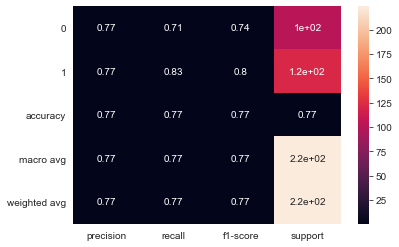

In [86]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [87]:
from sklearn.metrics import roc_auc_score
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

roc auc score:: 0.7668756027000964


In [89]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

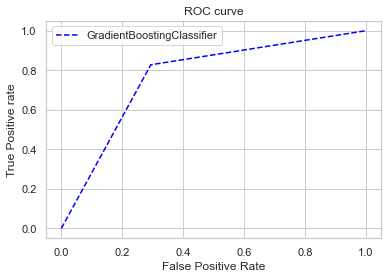

In [90]:
sns.set_theme(style="whitegrid")
plt.plot(fpr1, tpr1, linestyle='--',color='blue', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model

In [91]:
import joblib
joblib.dump(best_grbc_grid.best_estimator_,'Loan Application Status_Prediction.obj')

['Loan Application Status_Prediction.obj']